<a href="https://colab.research.google.com/github/brentwong-kiel1997/Using_ONLY_Canonical_SMILES_Expressions_to_Predict_IC50_with_a_Text-to-Text_Model/blob/main/Statistical_Portfolio_bioinfomatics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Statistical Portfolio - Bioinformatics**  

This is a bioinformatics work sample created by [Brent Wong](https://www.linkedin.com/in/mingqianwangbrent987614198/).  

[LINK to complete file folder
](https://drive.google.com/drive/folders/1Oz7fcWGoDp5RNj-UeZXbTxrNX1Z_qcxL?usp=sharing)

## [**Using ONLY Canonical SMILES Expressions to Predict Half-Maximal Inhibitory Concentration (IC50) with a Text-to-Text Model** ](https://https://github.com/brentwong-kiel1997/Using_ONLY_Canonical_SMILES_Expressions_to_Predict_IC50_with_a_Text-to-Text_Model)

### **Content Summary**  

This notebook is structured as follows:  

- **Parts 1, 2, & 3**: Data preparation steps necessary for modeling.  
- **Part 4**: Implementation and comparison of two different modeling approaches:  

  - **TF Model**: A TensorFlow-based model utilizing protein signatures as input, generated via the PaDEL-Descriptor method.  
  - **Torch Model**: A transfer learning model built with PyTorch that directly processes raw canonical SMILES expressions as input, eliminating the need for feature engineering.  

- **Part 5**: Final thoughts

This comparison highlights the trade-offs between structured feature-based modeling and direct text-based learning in predicting IC50 values.  

---

### **Inspiration: Protein Signatures with PaDEL-Descriptor**  

This notebook is inspired by the YouTube tutorial:  
[Python for Bioinformatics - Drug Discovery Using Machine Learning and Data Analysis](https://www.youtube.com/watch?v=jBlTQjcKuaY).  

In the tutorial, PaDEL-Descriptor was used to generate protein signatures from canonical SMILES expressions, which were then used as input for machine learning models.  

---

### **Canonical SMILES and Transfer Learning with a Text-Based Model**  

Canonical SMILES expressions inherently encode all the molecular information required for model training. Instead of extracting engineered features, we can leverage the raw SMILES notation itself as a direct input for a text-based model.  

Since SMILES expressions are textual, transfer learning techniques from natural language processing (NLP) can be applied to capture underlying molecular relationships, potentially improving predictive performance without manual feature engineering.  

---

### **Feature Engineering vs. Brute-Force  Modeling**  

Both approaches utilize the same underlying molecular information encoded in canonical SMILES expressions, but they differ in how the data is processed:  

- **Feature Engineering with PaDEL-Descriptor**:  
  This method converts SMILES into structured numerical representations (protein signatures), allowing machine learning models to work with pre-processed, feature-engineered inputs. This approach can improve interpretability and reduce computational complexity.  

- **Direct Text-Based Modeling (Brute-Force Approach)**:  
  Here, a text-based model is trained directly on raw SMILES expressions, relying on its ability to learn patterns from the textual representation without predefined feature extraction. Transfer learning and pre-trained language models can help capture complex molecular relationships that might be lost in manual transformations.  

While feature engineering can enhance model efficiency and interpretability, direct text-based modeling offers flexibility and leverages deep learning’s ability to automatically discover intricate patterns in molecular structures.  

---  

This notebook explores both approaches, comparing their effectiveness in predicting IC50 values and assessing the potential benefits of using text-based models in cheminformatics.  



### **References**

1. **ChEMBL Database**  
   European Bioinformatics Institute.  
   Retrieved from [https://www.ebi.ac.uk/chembl/](https://www.ebi.ac.uk/chembl/)

2. **ChemBERTa-ZINC-base-v1**  
   Seyonec. (n.d.). *ChemBERTa-ZINC-base-v1* [Model]. Hugging Face.  
   Retrieved from [https://huggingface.co/seyonec/ChemBERTa-zinc-base-v1](https://huggingface.co/seyonec/ChemBERTa-zinc-base-v1)

3. **Python for Bioinformatics - Drug Discovery Using Machine Learning and Data Analysis**  
   [Video]. (n.d.). YouTube.  
   Retrieved from [https://www.youtube.com/watch?v=jBlTQjcKuaY](https://www.youtube.com/watch?v=jBlTQjcKuaY)

4. **Lipinski's Rule of Five**  
   Lipinski, C. A., Lombardo, F., Dominy, B. W., & Feeney, P. J. (1997). *Experimental and computational approaches to estimate solubility and permeability in drug discovery and development settings*. Advanced Drug Delivery Reviews, 23(1-3), 3-25.

5. **PaDEL-Descriptor**  
   Yap, C. W. (2011). *PaDEL-Descriptor: An open source software to calculate molecular descriptors and fingerprints*. Journal of Computational Chemistry, 32(7), 1466-1474.  
   Retrieved from [http://www.yapcwsoft.com/dd/padeldescriptor/](http://www.yapcwsoft.com/dd/padeldescriptor/)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/udemy_course/bio-info/data'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Part 1 : Data collection and preprocessing from Chembl database

## install necessary package

In [ ]:
! pip install chembl_webresource_client

  Using cached chembl_webresource_client-0.10.9-py3-none-any.whl.metadata (1.4 kB)
  Using cached requests_cache-1.2.1-py3-none-any.whl.metadata (9.9 kB)
  Using cached cattrs-24.1.3-py3-none-any.whl.metadata (8.4 kB)
  Using cached url_normalize-2.2.0-py3-none-any.whl.metadata (4.9 kB)
Using cached chembl_webresource_client-0.10.9-py3-none-any.whl (55 kB)
Using cached requests_cache-1.2.1-py3-none-any.whl (61 kB)
Using cached cattrs-24.1.3-py3-none-any.whl (66 kB)
Using cached url_normalize-2.2.0-py3-none-any.whl (14 kB)


## search target protein



### Search HIV and find protein targets associated with the virus

In [ ]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [ ]:
target = new_client.target
target_query = target.search('HIV')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Human immunodeficiency virus,HIV protease,19.0,False,CHEMBL3638323,"[{'accession': 'Q9YQ30', 'component_descriptio...",SINGLE PROTEIN,12721
1,[],HIV-1 M:B_Lai,HIV-1 M:B_Lai,14.0,False,CHEMBL612775,[],ORGANISM,290579
2,[],Homo sapiens,Transcription factor HIVEP2,12.0,False,CHEMBL4523214,"[{'accession': 'P31629', 'component_descriptio...",SINGLE PROTEIN,9606
3,[],Homo sapiens,C-C chemokine receptor type 5,11.0,False,CHEMBL274,"[{'accession': 'P51681', 'component_descriptio...",SINGLE PROTEIN,9606
4,[],Homo sapiens,Ubiquitin thioesterase OTU1,11.0,False,CHEMBL4630833,"[{'accession': 'Q5VVQ6', 'component_descriptio...",SINGLE PROTEIN,9606
5,[],Homo sapiens,DDB1- and CUL4-associated factor 1,11.0,False,CHEMBL5465521,"[{'accession': 'Q9Y4B6', 'component_descriptio...",SINGLE PROTEIN,9606
6,[],Homo sapiens,Histone acetyltransferase KAT5,9.0,False,CHEMBL5750,"[{'accession': 'Q92993', 'component_descriptio...",SINGLE PROTEIN,9606
7,[],Homo sapiens,DCAF1-BRD9,9.0,False,CHEMBL5465396,"[{'accession': 'Q9H8M2', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
8,[],Homo sapiens,Human immunodeficiency virus type I enhancer-b...,8.0,False,CHEMBL2909,"[{'accession': 'P15822', 'component_descriptio...",SINGLE PROTEIN,9606
9,[],Homo sapiens,CCR5/mu opioid receptor complex,8.0,False,CHEMBL3301384,"[{'accession': 'P51681', 'component_descriptio...",PROTEIN COMPLEX,9606


## select and retrieve bioactivity data for [C-C chemokine receptor type 5	(CHEMBL274)](https://www.ebi.ac.uk/chembl/explore/target/CHEMBL274#NameAndClassification)

C-C chemokine receptor type 5 (CCR5) is a protein on the surface of immune cells that acts as a receptor for chemokines, playing a crucial role in HIV infection and immune cell trafficking.



### select data and filter the standard using IC50

In [ ]:
selected_target = 'CHEMBL274'
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

df = pd.DataFrame.from_dict(res)
df.head(3)

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,75508,[],CHEMBL654653,Binding affinity against C-C chemokine recepto...,B,None,None,BAO_0000190,...,Homo sapiens,C-C chemokine receptor type 5,9606,None,None,IC50,nM,UO_0000065,None,335.0
1,None,None,75509,[],CHEMBL654653,Binding affinity against C-C chemokine recepto...,B,None,None,BAO_0000190,...,Homo sapiens,C-C chemokine receptor type 5,9606,None,None,IC50,nM,UO_0000065,None,28.0
2,None,None,75510,[],CHEMBL654653,Binding affinity against C-C chemokine recepto...,B,None,None,BAO_0000190,...,Homo sapiens,C-C chemokine receptor type 5,9606,None,None,IC50,nM,UO_0000065,None,10.0


### dataset information
Checking the column names and make sure we only have one unique value in **standard_units** and **standard_type**.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3918 entries, 0 to 3917
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   action_type                78 non-null     object 
 1   activity_comment           951 non-null    object 
 2   activity_id                3918 non-null   int64  
 3   activity_properties        3918 non-null   object 
 4   assay_chembl_id            3918 non-null   object 
 5   assay_description          3918 non-null   object 
 6   assay_type                 3918 non-null   object 
 7   assay_variant_accession    0 non-null      object 
 8   assay_variant_mutation     0 non-null      object 
 9   bao_endpoint               3918 non-null   object 
 10  bao_format                 3918 non-null   object 
 11  bao_label                  3918 non-null   object 
 12  canonical_smiles           3885 non-null   object 
 13  data_validity_comment      65 non-null     objec

In [ ]:
df.standard_units.unique()

array(['nM', None], dtype=object)

In [ ]:
df.standard_type.unique()

array(['IC50'], dtype=object)

### save the data in CVS format

In [ ]:
df.to_csv('bioactivity_data.csv', index = False)

In [ ]:
! cp bioactivity_data.csv /content/drive/MyDrive/udemy_course/bio-info/data/

### check for missing data

drop data entry without standard_value

In [ ]:
df2 = df[df.standard_value.notna()]

In [ ]:
if len(df) == len(df2):
  print("No missing data")
else:
  print("Missing data")
  df2 = df2.reset_index(drop=True)

Missing data


### Bioactivity Classification Example

In this example, we define a function `classify_bioactivity` to classify bioactivity values from a DataFrame's column `standard_value` into three categories:

- **Active**: if the value is less than or equal to 1000.
- **Inactive**: if the value is greater than or equal to 10000.
- **Intermediate**: if the value falls between 1000 and 10000.

We then apply this function to the `standard_value` column in our DataFrame (`df2`) and create a new column named `bioactivity_class` to store the classification results.

In [ ]:
def classify_bioactivity(value):
  if float(value) >= 10000:
    return "inactive"
  elif float(value) <= 1000:
    return "active"
  else:
    return 'intermediate'  # Or any other value you want for the intermediate case

df2['bioactivity_class'] = df2['standard_value'].apply(classify_bioactivity).tolist()

df2.head(3)


,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value,bioactivity_class
0,None,None,75508,[],CHEMBL654653,Binding affinity against C-C chemokine recepto...,B,None,None,BAO_0000190,...,C-C chemokine receptor type 5,9606,None,None,IC50,nM,UO_0000065,None,335.0,active
1,None,None,75509,[],CHEMBL654653,Binding affinity against C-C chemokine recepto...,B,None,None,BAO_0000190,...,C-C chemokine receptor type 5,9606,None,None,IC50,nM,UO_0000065,None,28.0,active
2,None,None,75510,[],CHEMBL654653,Binding affinity against C-C chemokine recepto...,B,None,None,BAO_0000190,...,C-C chemokine receptor type 5,9606,None,None,IC50,nM,UO_0000065,None,10.0,active


### select from df2 to form new dataframe

In [ ]:
selection = ['molecule_chembl_id', 'canonical_smiles', 'standard_value', 'bioactivity_class']
df3 = df2[selection]
df3.info()
df3.to_csv('bioactivity_preprocessed_data.csv', index = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2978 entries, 0 to 2977
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   molecule_chembl_id  2978 non-null   object
 1   canonical_smiles    2978 non-null   object
 2   standard_value      2978 non-null   object
 3   bioactivity_class   2978 non-null   object
dtypes: object(4)
memory usage: 93.2+ KB


In [ ]:
! cp bioactivity_preprocessed_data.csv /content/drive/MyDrive/udemy_course/bio-info/data/

In [ ]:
df3.bioactivity_class.value_counts()

,count
bioactivity_class,
active,2432
intermediate,274
inactive,272


# Part 2 Exploratory data analysis

## Install rdkit

In [ ]:
!pip install rdkit
import sys
sys.path.append('/usr/local/lib/python3.11/site-packages/')


## import data

In [ ]:
import pandas as pd
df = pd.read_csv('bioactivity_preprocessed_data.csv')

## Lipinski's Rule of Five

**Christopher Lipinski**, a scientist at Pfizer, developed a set of rules—commonly known as **Lipinski's Rule of Five**—to evaluate the druglikeness of compounds. This evaluation is based on the pharmacokinetic profile, also known as **ADME** (Absorption, Distribution, Metabolism, and Excretion).

Lipinski analyzed all orally active FDA-approved drugs and formulated the following guidelines:

- **Molecular Weight**: < 500 Dalton  
- **Octanol-Water Partition Coefficient (LogP)**: < 5  
- **Hydrogen Bond Donors**: < 5  
- **Hydrogen Bond Acceptors**: < 10  


### Calculate descriptors and combine dataframe

In [ ]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [ ]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [ ]:
df_lipinski = lipinski(df.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,595.704,5.71140,0.0,9.0
1,518.618,4.64940,0.0,8.0
2,581.717,6.58170,0.0,7.0
3,557.181,5.28940,0.0,4.0
4,567.690,6.40760,0.0,7.0
...,...,...,...,...
2973,4063.131,-9.06517,47.0,57.0
2974,2708.034,-12.77309,43.0,37.0
2975,553.147,4.68362,1.0,4.0
2976,619.203,4.74302,1.0,5.0


In [ ]:
df_combined = pd.concat([df,df_lipinski], axis=1)
df_combined.info()
df_combined.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2978 entries, 0 to 2977
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_chembl_id  2978 non-null   object 
 1   canonical_smiles    2978 non-null   object 
 2   standard_value      2978 non-null   float64
 3   bioactivity_class   2978 non-null   object 
 4   MW                  2978 non-null   float64
 5   LogP                2978 non-null   float64
 6   NumHDonors          2978 non-null   float64
 7   NumHAcceptors       2978 non-null   float64
dtypes: float64(5), object(3)
memory usage: 186.3+ KB


,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL105460,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,335.0,active,595.704,5.7114,0.0,9.0
1,CHEMBL105606,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,28.0,active,518.618,4.6494,0.0,8.0
2,CHEMBL105570,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,10.0,active,581.717,6.5817,0.0,7.0


## convert IC50 to pIC50

In [ ]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input

    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

Which should not be a concern here since the maximum value is 1.000000e+07


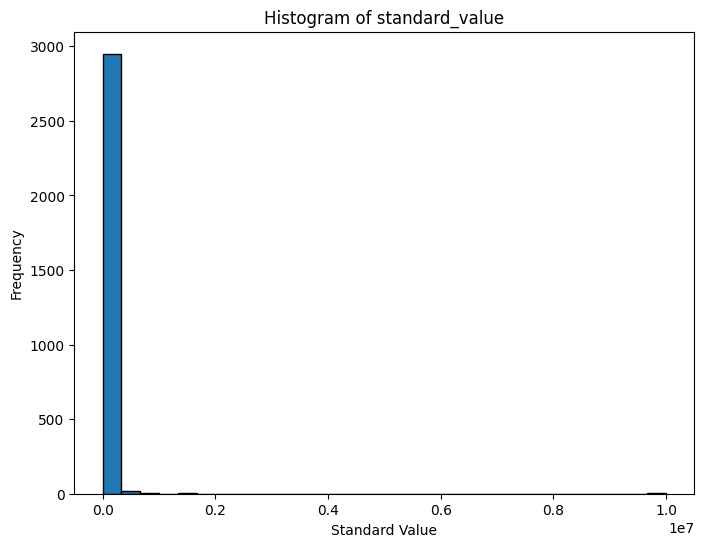

,standard_value
count,2.978000e+03
mean,2.142235e+04
std,3.271378e+05
min,3.000000e-03
25%,3.102500e+00
50%,3.000000e+01
75%,4.567500e+02
max,1.000000e+07


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df_combined['standard_value'].dropna(), bins=30, edgecolor='black')
plt.xlabel('Standard Value')
plt.ylabel('Frequency')
plt.title('Histogram of standard_value')
plt.show()

df_combined.standard_value.describe()

In [ ]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input

    return x

In [ ]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm,pIC50
0,CHEMBL105460,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,335.00,active,595.704,5.71140,0.0,9.0,335.00,6.474955
1,CHEMBL105606,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,28.00,active,518.618,4.64940,0.0,8.0,28.00,7.552842
2,CHEMBL105570,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,10.00,active,581.717,6.58170,0.0,7.0,10.00,8.000000
3,CHEMBL83338,CN(C[C@@H](CCN1CCC2(CC1)C[S+]([O-])c1ccccc12)c...,35.00,active,557.181,5.28940,0.0,4.0,35.00,7.455932
4,CHEMBL325357,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,15.00,active,567.690,6.40760,0.0,7.0,15.00,7.823909
...,...,...,...,...,...,...,...,...,...,...
2973,CHEMBL5410204,CC[C@H](C)[C@H](NC(C)=O)C(=O)N[C@@H](CCC(=O)O)...,10.27,active,4063.131,-9.06517,47.0,57.0,10.27,7.988430
2974,CHEMBL5415654,CC[C@H](C)[C@H](NC(C)=O)C(=O)N[C@@H](CCC(=O)O)...,10000.00,inactive,2708.034,-12.77309,43.0,37.0,10000.00,5.000000
2975,CHEMBL207004,CC(=O)N1CCC(C(=O)N(CCCN2CCC(Cc3ccc(C(N)=O)cc3)...,0.83,active,553.147,4.68362,1.0,4.0,0.83,9.080922
2976,CHEMBL5438380,CC(=O)N1CCC(C(=O)N(CCCN2C3CCC2CC(NS(=O)(=O)c2c...,1.08,active,619.203,4.74302,1.0,5.0,1.08,8.966576


still the same dataset after transformation

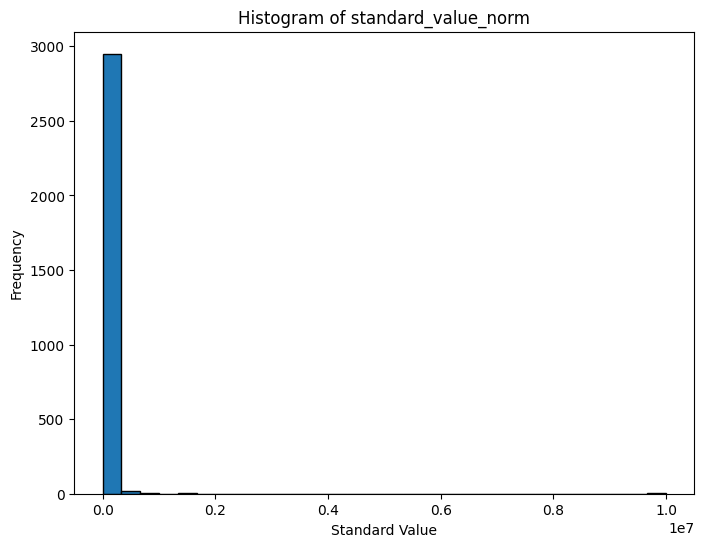

,standard_value
count,2.978000e+03
mean,2.142235e+04
std,3.271378e+05
min,3.000000e-03
25%,3.102500e+00
50%,3.000000e+01
75%,4.567500e+02
max,1.000000e+07


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df_combined['standard_value_norm'].dropna(), bins=30, edgecolor='black')
plt.xlabel('Standard Value')
plt.ylabel('Frequency')
plt.title('Histogram of standard_value_norm')
plt.show()

df_combined.standard_value.describe()

In [ ]:
df_final = pIC50(df_norm)
df_final.to_csv('bioactivity_data_3class_pIC50.csv', index=False)
df_final.head(3)

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm,pIC50
0,CHEMBL105460,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,335.0,active,595.704,5.7114,0.0,9.0,335.0,6.474955
1,CHEMBL105606,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,28.0,active,518.618,4.6494,0.0,8.0,28.0,7.552842
2,CHEMBL105570,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,10.0,active,581.717,6.5817,0.0,7.0,10.0,8.000000


In [ ]:
! cp bioactivity_data_3class_pIC50.csv /content/drive/MyDrive/udemy_course/bio-info/data/

## Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors


## Frequency plot of the 3 bioactivity classes

<ipython-input-75-e1da3bef5b6c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bioactivity_class', data=df_final, edgecolor='black', palette="Set2")


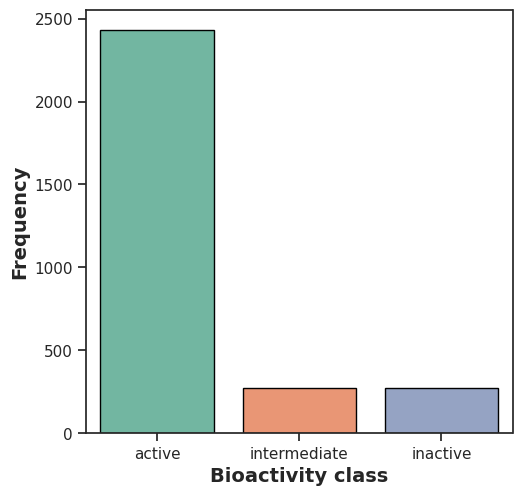

In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

plt.figure(figsize=(5.5, 5.5))
sns.countplot(x='bioactivity_class', data=df_final, edgecolor='black', palette="Set2")
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.savefig('plot_bioactivity_class.pdf')
plt.show()


## Scatter plot of MW versus LogP

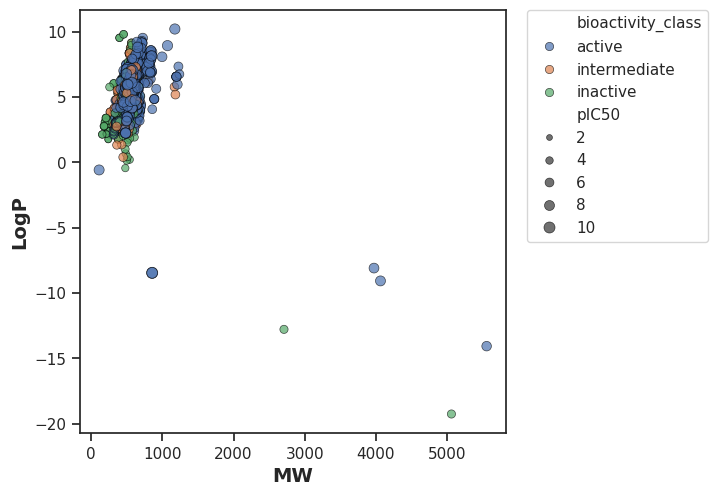

In [ ]:

plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_combined, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

## Box plots

### pIC50 value

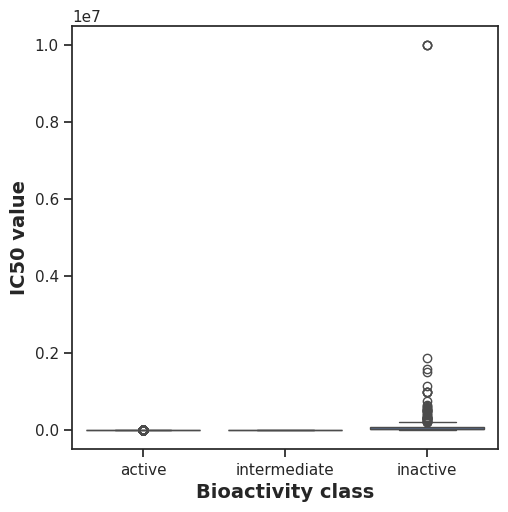

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'standard_value_norm', data = df_combined)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('IC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')


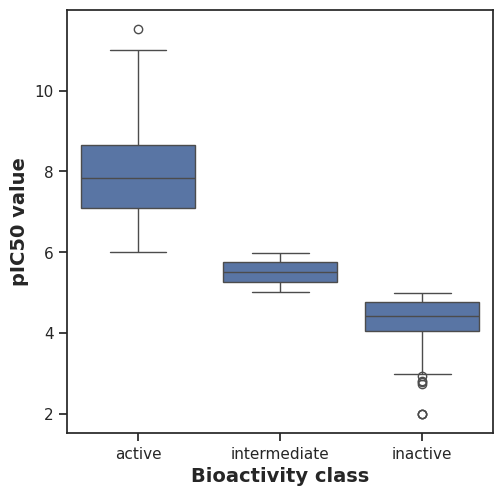

In [ ]:

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_combined)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_pic50.pdf')


Statistical analysis | Mann-Whitney U Test



In [ ]:

def mannwhitney(descriptor, verbose=False, alpha = 0.05):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_combined[selection]
  active = df[df['bioactivity_class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_combined[selection]
  inactive = df[df['bioactivity_class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha =  alpha
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pIC50')
if mannwhitney('pIC50').p[0] <= mannwhitney('pIC50').alpha[0]:
  print("Descriptor is significantly different")
else:
  print("Descriptor is not significantly different")

Descriptor is significantly different


The active and inative class have different distribution

### pIC50, MW, LogP, NumHDonors, NumHAcceptors

pIC50 is significantly different at 1.0% confidence level.
MW is significantly different at 1.0% confidence level.
LogP is significantly different at 1.0% confidence level.
NumHDonors is significantly different at 1.0% confidence level.
NumHAcceptors is not significantly different at 1.0% confidence level.


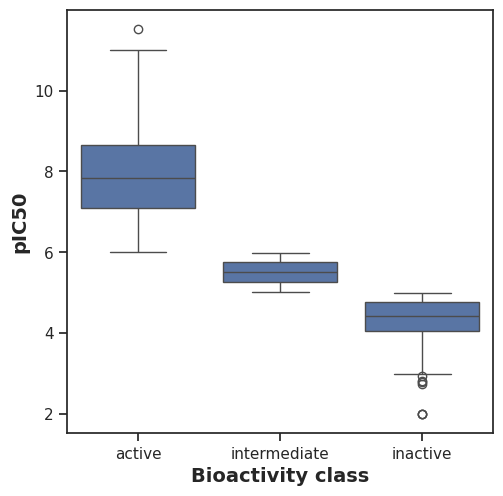

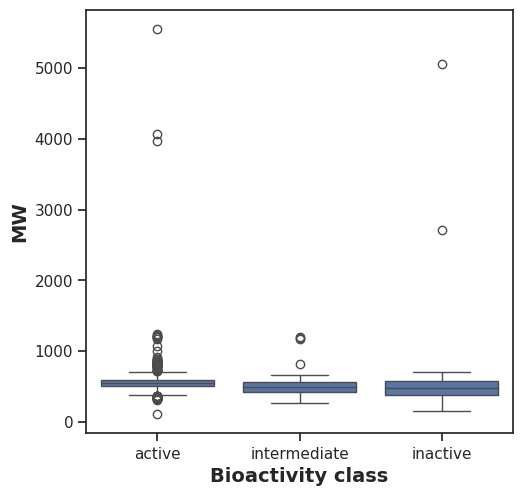

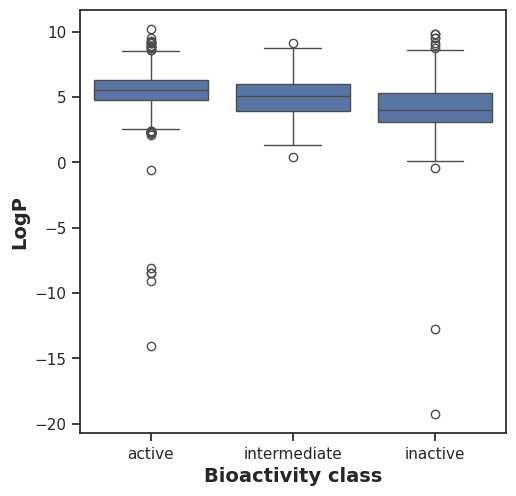

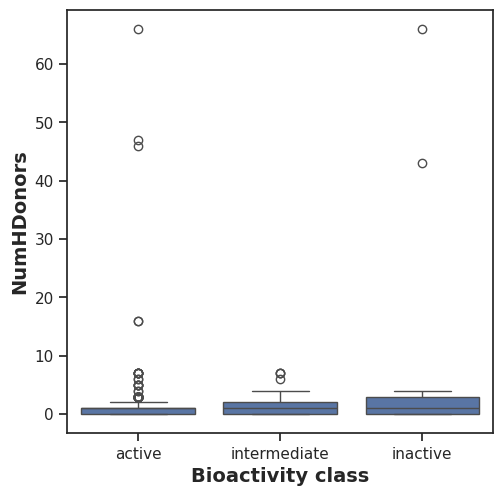

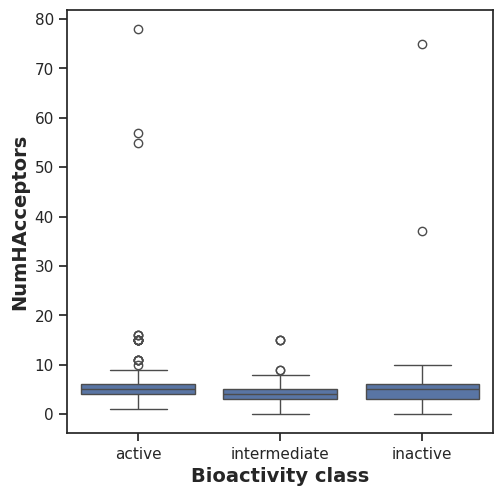

In [ ]:
list_ = ['pIC50', 'MW', 'LogP', 'NumHDonors', 'NumHAcceptors']

for i in list_:
  plt.figure(figsize=(5.5, 5.5))

  sns.boxplot(x = 'bioactivity_class', y = i, data = df_combined)

  plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
  plt.ylabel(i, fontsize=14, fontweight='bold')

  plt.savefig(f'plot_{i}.pdf')
  mannwhitney(i)


  mw_df = mannwhitney(i, alpha = 0.01)
  if mw_df.p[0] <= mw_df.alpha[0]:
    print(f"{i} is significantly different at {mw_df.alpha[0]*100}% confidence level.")
  else:
    print(f"{i} is not significantly different at {mw_df.alpha[0]*100}% confidence level.")

### Interpretation of Statistical Results

#### pIC50 Values

- **Observation:**  
  The pIC50 values show a statistically significant difference between active and inactive compounds at the 1.0% significance level.

- **Explanation:**  
  This result aligns with the classification thresholds used:
  - **Active compounds:** IC50 < 1,000 nM, corresponding to pIC50 > 6
  - **Inactive compounds:** IC50 > 10,000 nM, corresponding to pIC50 < 5
  These predefined thresholds inherently create distinct pIC50 distributions between the two groups.

#### Lipinski's Descriptors

- **Molecular Weight (MW):**
  - **Observation:**  
    A statistically significant difference in MW between active and inactive compounds at the 1.0% significance level.
  - **Explanation:**  
    This suggests that MW influences bioactivity, with active compounds tending to have different molecular weights compared to inactive ones. According to Lipinski's Rule of Five, a molecular weight greater than 500 may reduce a compound's likelihood of being orally active.

- **LogP:**
  - **Observation:**  
    A statistically significant difference in LogP values between active and inactive compounds at the 1.0% significance level.
  - **Explanation:**  
    LogP, indicating lipophilicity, affects a compound's ability to permeate cell membranes. Significant differences imply that lipophilicity plays a role in distinguishing active compounds from inactive ones. Lipinski's Rule states that a LogP value greater than 5 may decrease the probability of oral absorption.

- **Number of Hydrogen Bond Donors (NumHDonors):**
  - **Observation:**  
    A statistically significant difference in the number of hydrogen bond donors between active and inactive compounds at the 1.0% significance level.
  - **Explanation:**  
    Hydrogen bond donors can influence solubility and membrane permeability. Differences suggest that the number of hydrogen bond donors contributes to bioactivity. Lipinski's Rule indicates that having more than 5 hydrogen bond donors may impair absorption or permeation.

- **Number of Hydrogen Bond Acceptors (NumHAcceptors):**
  - **Observation:**  
    No statistically significant difference in the number of hydrogen bond acceptors between active and inactive compounds at the 1.0% significance level.
  - **Explanation:**  
    This suggests that the number of hydrogen bond acceptors may not be a distinguishing factor between active and inactive compounds in this dataset. Lipinski's Rule notes that having more than 10 hydrogen bond acceptors could affect absorption, but within this dataset, this descriptor does not appear to differentiate bioactivity classes.


# Part 3 Protein Signiture : Description calculation

## Download PaDEL-Descriptor


In [ ]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2025-04-01 04:25:01--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2025-04-01 04:25:01--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M  --.-KB/s    in 0.1s    

2025-04-01 04:25:01 (170 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2025-04-01 04:25:01--  https://github

In [ ]:
! unzip padel.zip

## import data

create unique ID for the dataset since molecule_chembl_id is not unique

In [ ]:
import pandas as pd
df = pd.read_csv('/content/bioactivity_data_3class_pIC50.csv')
df['key'] = df.index
df.head(3)

columnNames = df.columns.values

columnNames

array(['molecule_chembl_id', 'canonical_smiles', 'standard_value',
       'bioactivity_class', 'MW', 'LogP', 'NumHDonors', 'NumHAcceptors',
       'standard_value_norm', 'pIC50', 'key'], dtype=object)

In [ ]:
selection = ['canonical_smiles', 'key']
df_selection = df[selection]
df_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [ ]:
! cat molecule.smi | head -5

C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(Cn2nnnc2-c2ccccc2)c2ccccc2)CC1	0
C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(Cn2cncn2)c2ccccc2)CC1	1
C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(C)(Cn2cnc3ccccc32)c2ccccc2)CC1	2
CN(C[C@@H](CCN1CCC2(CC1)C[S+]([O-])c1ccccc12)c1cccc(Cl)c1)S(=O)(=O)c1ccccc1	3
C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(Cn2ncc3ccccc32)c2ccccc2)CC1	4


In [ ]:
! cat molecule.smi | wc -l

2978


## calculate PaDElL descriptors

In [ ]:
! bash padel.sh

In [ ]:
! cp /content/descriptors_output.csv /content/drive/MyDrive/udemy_course/bio-info/data/

## Load and join bioactivity data

In [ ]:
df3 = pd.read_csv('descriptors_output.csv')
df3

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2973,2973,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2974,2975,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2975,2976,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2976,2977,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dataset3 = pd.merge(df3, df, left_on='Name', right_on='key', how='left')
print(sum(dataset3['Name'] == dataset3['key']))
dataset3.head(3)

2978


,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm,pIC50,key
0,1,1,1,1,1,0,0,0,0,0,...,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,28.0,active,518.618,4.6494,0.0,8.0,28.0,7.552842,1
1,0,1,1,1,1,0,0,0,0,0,...,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,335.0,active,595.704,5.7114,0.0,9.0,335.0,6.474955,0
2,2,1,1,1,1,0,0,0,0,0,...,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,10.0,active,581.717,6.5817,0.0,7.0,10.0,8.000000,2


In [ ]:
dataset3 = dataset3.drop(columns=['Name'], axis=1)

In [ ]:
dataset3.head(3)

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm,pIC50,key
0,1,1,1,1,0,0,0,0,0,1,...,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,28.0,active,518.618,4.6494,0.0,8.0,28.0,7.552842,1
1,1,1,1,1,0,0,0,0,0,1,...,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,335.0,active,595.704,5.7114,0.0,9.0,335.0,6.474955,0
2,1,1,1,1,0,0,0,0,0,1,...,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,10.0,active,581.717,6.5817,0.0,7.0,10.0,8.000000,2


In [ ]:
dataset3.to_csv('CHEMBL274_bioactivity_data_pIC50_pubchem_fp.csv', index=False)

In [ ]:
! cp CHEMBL274_bioactivity_data_pIC50_pubchem_fp.csv /content/drive/MyDrive/udemy_course/bio-info/data/

# Part 4 Model building

## Split dataset into training and testing

In [ ]:
import pandas as pd
dataset3 = pd.read_csv('/content/drive/MyDrive/udemy_course/bio-info/data/CHEMBL274_bioactivity_data_pIC50_pubchem_fp.csv')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/udemy_course/bio-info/data/bioactivity_data_3class_pIC50.csv')
df['key'] = df.index
df.head(3)

columnNames = df.columns.values

columnNames

array(['molecule_chembl_id', 'canonical_smiles', 'standard_value',
       'bioactivity_class', 'MW', 'LogP', 'NumHDonors', 'NumHAcceptors',
       'standard_value_norm', 'pIC50', 'key'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split

# Split DataFrame into 80% training, 20% test
df_train, df_test = train_test_split(
    dataset3,
    test_size=0.2,        # Fraction of data for testing (e.g., 0.2 = 20%)
    random_state=42,      # Seed for reproducibility
    shuffle=True,          # Shuffle data before splitting (default)
)

## TF Model: Model with protein signature as input (Built with Tensorflow)

### define training data

In [ ]:
X_train = df_train.drop(columnNames, axis=1)
y_train = df_train['pIC50']
X_test = df_test.drop(columnNames, axis=1)
y_test = df_test['pIC50']

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2382, 881), (2382,), (596, 881), (596,))

### building and training model

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# Set seed for reproducibility
tf.random.set_seed(42)

# Define the model
model = keras.Sequential([
    keras.layers.Dense(32, activation='sigmoid', input_shape=(881,), kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(16, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1)
])

# Define a learning rate schedule with a slower decay at later epochs
def lr_schedule(epoch, lr):
    if epoch < 100:
        return lr * 0.98  # Faster decay in early epochs
    elif epoch < 200:
        return lr * 0.99  # Moderate decay
    else:
        return lr * 0.995  # Slower decay in later epochs

# Compile the model with an initial learning rate
initial_lr = 0.01
optimizer = keras.optimizers.Adam(learning_rate=initial_lr)
model.compile(optimizer=optimizer,
              loss='mse',
              metrics=['mae'])

# Define the learning rate scheduler callback
lr_scheduler = keras.callbacks.LearningRateScheduler(lr_schedule)

# Train the model
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    epochs=150,
                    batch_size=128,
                    verbose=1,
                    callbacks=[lr_scheduler])

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Validation Loss: {loss:.4f}, Validation MAE: {mae:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - loss: 38.0764 - mae: 5.7702 - val_loss: 3.4323 - val_mae: 1.3937 - learning_rate: 0.0098
Epoch 2/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.1678 - mae: 1.5596 - val_loss: 3.2245 - val_mae: 1.5083 - learning_rate: 0.0096
Epoch 3/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.7050 - mae: 1.3365 - val_loss: 2.4284 - val_mae: 1.2460 - learning_rate: 0.0094
Epoch 4/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.3576 - mae: 1.2265 - val_loss: 2.3711 - val_mae: 1.2150 - learning_rate: 0.0092
Epoch 5/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.2671 - mae: 1.1859 - val_loss: 2.3010 - val_mae: 1.2060 - learning_rate: 0.0090
Epoch 6/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1807 - mae: 1.1640 - val_loss: 2.1969 - val_mae: 1.1905 - learning_rate: 0.0089
Epoch 7/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.0229 - mae: 1.1179 - val_loss: 1.9496 - val_mae: 1.0898 - learning_rate: 0.0087
Epoch 8/150

### save model

In [ ]:
import tensorflow as tf

model.save("tf_model.keras")


In [ ]:
! cp tf_model.keras /content/drive/MyDrive/udemy_course/bio-info/data/

### training step plot

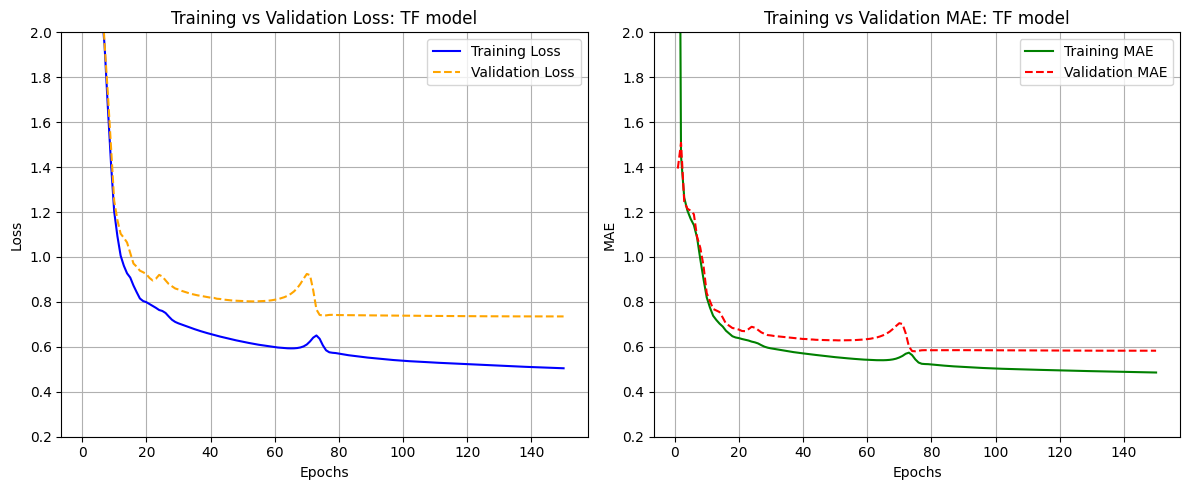

In [ ]:
from matplotlib import pyplot as plt
# Extract values
epochs = range(1, len(history.history['loss']) + 1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_metric = history.history['mae']
val_metric = history.history['val_mae']

# Create figure and subplots (1 row, 2 columns)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot Loss (Left Subplot)
axes[0].plot(epochs, train_loss, label='Training Loss', color='blue')
axes[0].plot(epochs, val_loss, label='Validation Loss', color='orange', linestyle='--')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].set_title('Training vs Validation Loss: TF model')
axes[0].set_ylim(0.2, 2)  # Set Y-axis limits
axes[0].legend()
axes[0].grid()

# Plot MAE (Right Subplot)
axes[1].plot(epochs, train_metric, label='Training MAE', color='green')
axes[1].plot(epochs, val_metric, label='Validation MAE', color='red', linestyle='--')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('MAE')
axes[1].set_title('Training vs Validation MAE: TF model')
axes[1].set_ylim(0.2, 2)  # Set Y-axis limits
axes[1].legend()
axes[1].grid()

# Adjust layout and show
plt.tight_layout()
plt.savefig("tf_loss_mae.png")
plt.show()

In [ ]:
! cp tf_loss_mae.png /content/drive/MyDrive/udemy_course/bio-info/data/

## Torch Model: Model with ONLY raw canonical smiles expression as input (Transform learning model built with PyTorch)

In [ ]:
X_train = df_train['canonical_smiles']
y_train = df_train['pIC50']
X_test = df_test['canonical_smiles']
y_test = df_test['pIC50']

In [ ]:
import torch
import torch.nn as nn
from transformers import AutoTokenizer, AutoModel
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import pandas as pd
import torch.optim as optim
from torch.optim.lr_scheduler import ExponentialLR


### define the dataset loading class

In [ ]:
class SMILESDataset(Dataset):
    def __init__(self, smiles_list, labels, tokenizer, max_length):
        self.smiles_list = smiles_list
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.smiles_list)

    def __getitem__(self, idx):
        smiles = self.smiles_list[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(
            smiles,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors="pt",
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'label': torch.tensor(label, dtype=torch.float),
        }


### define the model

In [ ]:
MODEL_NAME = "seyonec/ChemBERTa-zinc-base-v1"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
base_model = AutoModel.from_pretrained(MODEL_NAME)


In [ ]:
class ChemBERTaRegressor(nn.Module):
    def __init__(self, base_model, unfreeze_last_n=5):
        super(ChemBERTaRegressor, self).__init__()
        self.chemberta = base_model
        self.regressor = nn.Linear(self.chemberta.config.hidden_size, 1)

        # Freeze all parameters first
        for param in self.chemberta.parameters():
            param.requires_grad = False

        # Unfreeze the last 'unfreeze_last_n' layers
        # Note: This assumes the model has an 'encoder.layer' attribute.
        num_layers = len(self.chemberta.encoder.layer)
        for i in range(num_layers - unfreeze_last_n, num_layers):
            for param in self.chemberta.encoder.layer[i].parameters():
                param.requires_grad = True

    def forward(self, input_ids, attention_mask):
        outputs = self.chemberta(input_ids=input_ids, attention_mask=attention_mask)
        # Use the [CLS] token embedding (first token) as the summary representation.
        cls_output = outputs.last_hidden_state[:, 0, :]
        value = self.regressor(cls_output)
        return value

### load data

In [ ]:
# Parameters
max_length = 512
batch_size = 128

# Create datasets
train_dataset = SMILESDataset(X_train.tolist(), y_train.tolist(), tokenizer, max_length)
test_dataset = SMILESDataset(X_test.tolist(), y_test.tolist(), tokenizer, max_length)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [ ]:
# Initialize the Model and Send to Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ChemBERTaRegressor(base_model, unfreeze_last_n=2)  # unfreeze last 2 layers
model.to(device)


ChemBERTaRegressor(
  (chemberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(767, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-5): 6 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm)

### loss function and Optimizer

In [ ]:
#Define Loss Function and Optimizer
criterion = nn.MSELoss()
# Only parameters with requires_grad=True will be optimized.
optimizer = torch.optim.AdamW(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)
# Reduce learning rate by a factor of gamma every epoch
gamma = 0.99
scheduler = ExponentialLR(optimizer, gamma=gamma)

### training loop

In [ ]:
epochs = 60
train_losses, val_losses = [], []
train_mae_list, val_mae_list = [], []

In [ ]:
for epoch in range(epochs):
    model.train()
    total_train_loss = 0.0
    train_preds, train_labels = [], []

    for batch in train_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask).squeeze()
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()
        train_preds.extend(outputs.detach().cpu().numpy())
        train_labels.extend(labels.cpu().numpy())

    avg_train_loss = total_train_loss / len(train_loader)
    train_mae = mean_absolute_error(train_labels, train_preds)

    # Validation
    model.eval()
    total_val_loss = 0.0
    val_preds, val_labels = [], []

    # reduce learning rate
    scheduler.step()

    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask).squeeze()
            loss = criterion(outputs, labels)
            total_val_loss += loss.item()
            val_preds.extend(outputs.cpu().numpy())
            val_labels.extend(labels.cpu().numpy())

    avg_val_loss = total_val_loss / len(test_loader)
    val_mae = mean_absolute_error(val_labels, val_preds)

    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)
    train_mae_list.append(train_mae)
    val_mae_list.append(val_mae)

    print(f"Epoch {epoch+1}/{epochs}")
    print(f"  Train Loss: {avg_train_loss:.4f} | Train MAE: {train_mae:.4f}")
    print(f"  Test   Loss: {avg_val_loss:.4f} | Test   MAE: {val_mae:.4f}")


Epoch 1/60
  Train Loss: 2.4673 | Train MAE: 1.2724
  Test   Loss: 2.4854 | Test   MAE: 1.2365
Epoch 2/60
  Train Loss: 2.2509 | Train MAE: 1.2159
  Test   Loss: 2.4703 | Test   MAE: 1.2345
Epoch 3/60
  Train Loss: 2.2411 | Train MAE: 1.2042
  Test   Loss: 2.4937 | Test   MAE: 1.2371
Epoch 4/60
  Train Loss: 2.2446 | Train MAE: 1.2106
  Test   Loss: 2.3187 | Test   MAE: 1.2459
Epoch 5/60
  Train Loss: 2.2322 | Train MAE: 1.2099
  Test   Loss: 2.3769 | Test   MAE: 1.2149
Epoch 6/60
  Train Loss: 2.0112 | Train MAE: 1.1433
  Test   Loss: 1.4447 | Test   MAE: 0.9600
Epoch 7/60
  Train Loss: 2.1143 | Train MAE: 1.1547
  Test   Loss: 2.4358 | Test   MAE: 1.1982
Epoch 8/60
  Train Loss: 1.5761 | Train MAE: 0.9995
  Test   Loss: 1.1338 | Test   MAE: 0.8493
Epoch 9/60
  Train Loss: 1.1257 | Train MAE: 0.8412
  Test   Loss: 1.2140 | Test   MAE: 0.8446
Epoch 10/60
  Train Loss: 1.0477 | Train MAE: 0.8125
  Test   Loss: 0.9385 | Test   MAE: 0.7393
Epoch 11/60
  Train Loss: 0.9615 | Train MAE: 0.7

KeyboardInterrupt: 

### save model

In [ ]:
torch.save(model, "torch_model_complete.pth")
! cp torch_model_complete.pth /content/drive/MyDrive/udemy_course/bio-info/data/

In [ ]:
torch_model = torch.load("/content/drive/MyDrive/udemy_course/bio-info/data/torch_model_complete.pth", weights_only=False)
model = torch_model

### training step plot

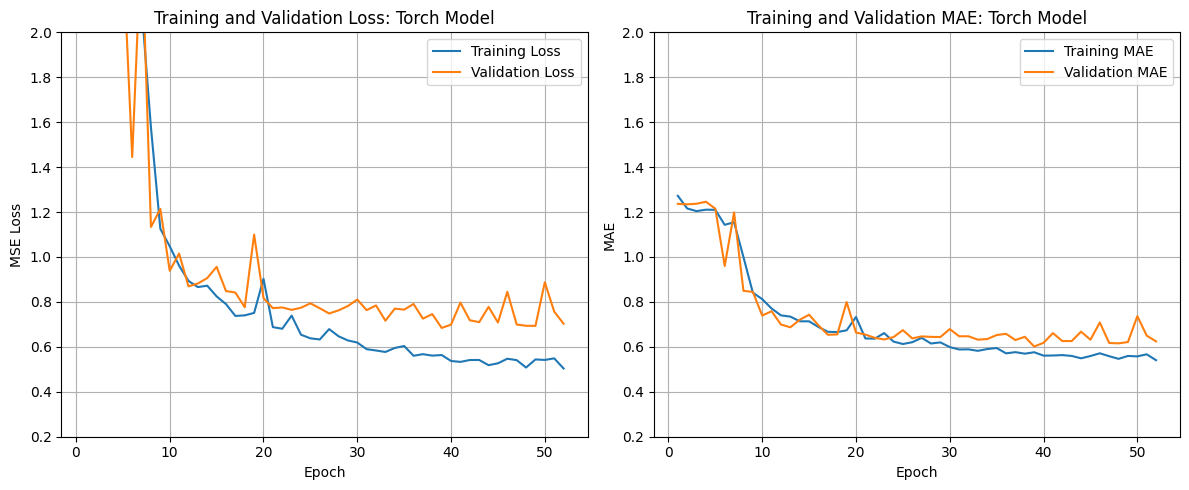

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

epochs_range = np.arange(1,len(train_losses)+1)

plt.figure(figsize=(12, 5))
# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_losses, label='Training Loss')
plt.plot(epochs_range, val_losses, label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.ylim(0.2, 2)  # Set Y-axis limits
plt.title("Training and Validation Loss: Torch Model")
plt.legend()
plt.grid()


# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_mae_list, label='Training MAE')
plt.plot(epochs_range, val_mae_list, label='Validation MAE')
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.ylim(0.2, 2)  # Set Y-axis limits
plt.title("Training and Validation MAE: Torch Model")
plt.legend()
plt.grid()

plt.tight_layout()
plt.savefig("torch_loss_mae.png")
plt.show()



In [ ]:
! cp torch_loss_mae.png /content/drive/MyDrive/udemy_course/bio-info/data/

In [ ]:
final_val_mae = val_mae_list[-1]
print("Final Validation MAE:", final_val_mae)

Final Validation MAE: 0.6242418017163373


## comparison

### scatter plot

In [ ]:
tf_model = tf.keras.models.load_model("/content/drive/MyDrive/udemy_course/bio-info/data/tf_model.keras")

torch_model = torch.load("/content/drive/MyDrive/udemy_course/bio-info/data/torch_model_complete.pth", weights_only=False)

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
X_train_tf = df_train.drop(columnNames, axis=1)
y_train_tf = df_train['pIC50']
X_test_tf = df_test.drop(columnNames, axis=1)
y_test_tf = df_test['pIC50']

In [ ]:
# Create datasets
train_dataset = SMILESDataset(X_train.tolist(), y_train.tolist(), tokenizer, max_length)
test_dataset = SMILESDataset(X_test.tolist(), y_test.tolist(), tokenizer, max_length)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
y_test_pred_tf = np.array(tf_model.predict(X_test_tf))

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [ ]:
import torch
import numpy as np

# Set model to evaluation mode
torch_model.eval()

# Choose device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch_model.to(device)

# Store predictions
predictions = []

# Disable gradient computation for inference
with torch.no_grad():
    for batch in test_loader:
        if isinstance(batch, dict):
            # Extract input tensors from dictionary
            inputs = batch["input_ids"].to(device)  # Adjust key name as needed
            attention_mask = batch.get("attention_mask", None)  # Some tokenizers use this
            if attention_mask is not None:
                attention_mask = attention_mask.to(device)
        else:
            inputs = batch[0].to(device) if isinstance(batch, (list, tuple)) else batch.to(device)

        # Get model outputs
        if attention_mask is not None:
            outputs = torch_model(inputs, attention_mask=attention_mask)
        else:
            outputs = torch_model(inputs)

        # Handle classification (multi-class) or regression cases
        if outputs.shape[-1] > 1:
            preds = torch.softmax(outputs, dim=-1).argmax(dim=-1)  # Classification
        else:
            preds = outputs.squeeze()  # Regression (remove extra dimensions)

        # Move to CPU and convert to NumPy
        predictions.extend(preds.cpu().numpy())

# Convert to NumPy array
predictions = np.array(predictions)

# Print first few predictions
print(predictions[:10])


[6.6944146 7.2800364 8.423693  6.2349963 9.35037   6.266393  9.730738
 7.037769  5.127792  8.976792 ]


In [ ]:
y_test_pred_torch = predictions

In [ ]:
y_test = np.array(df_test['pIC50'])

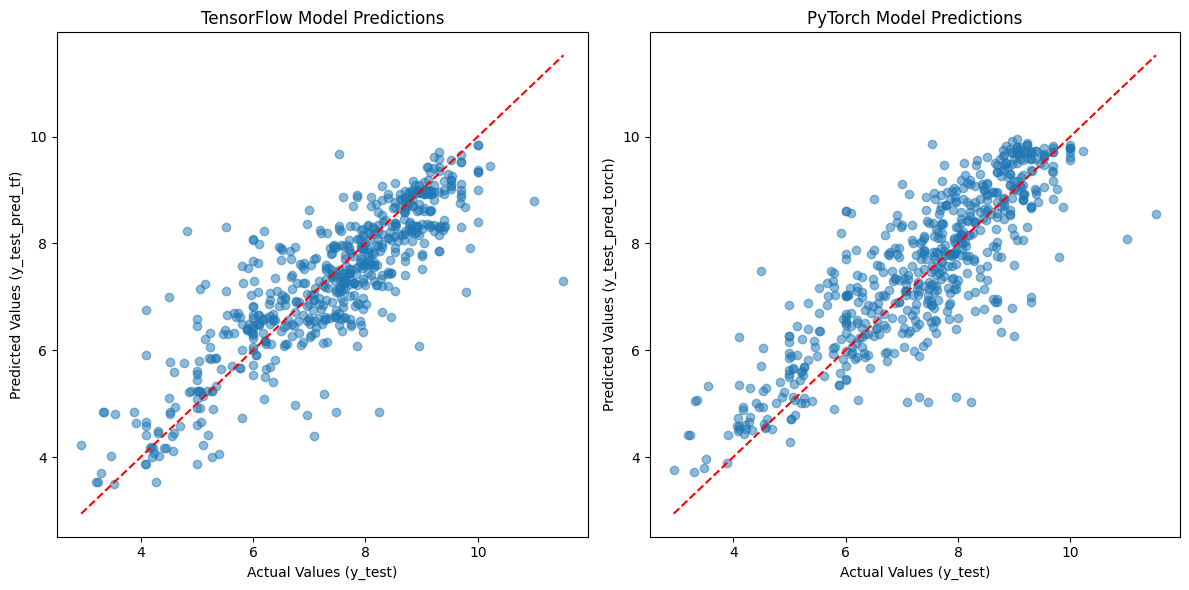

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and a set of subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Adjust figsize as needed

# Scatter plot 1: (y_test_pred_tf, y_test)
axes[0].scatter(y_test, y_test_pred_tf, alpha=0.5)  # alpha for transparency
axes[0].set_xlabel("Actual Values (y_test)")
axes[0].set_ylabel("Predicted Values (y_test_pred_tf)")
axes[0].set_title("TensorFlow Model Predictions")

# Scatter plot 2: (y_test_pred_torch, y_test)
axes[1].scatter(y_test, y_test_pred_torch, alpha=0.5)
axes[1].set_xlabel("Actual Values (y_test)")
axes[1].set_ylabel("Predicted Values (y_test_pred_torch)")
axes[1].set_title("PyTorch Model Predictions")

# Add y = x line to both subplots
x_line = np.linspace(min(y_test), max(y_test), 100)  # Create x values for the line
axes[0].plot(x_line, x_line, color='red', linestyle='--', label='y = x')  # Plot on subplot 1
axes[1].plot(x_line, x_line, color='red', linestyle='--', label='y = x')  # Plot on subplot 2


# Adjust layout and show the plots
plt.tight_layout()
plt.show()

### R-Squared	RMSE

In [ ]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
# TensorFlow Model
r2_tf = r2_score(y_test, y_test_pred_tf)

# PyTorch Model
r2_torch = r2_score(y_test, y_test_pred_torch)

print(f"TensorFlow R-squared: {r2_tf:.4f}")
print(f"PyTorch R-squared: {r2_torch:.4f}")

TensorFlow R-squared: 0.7260
PyTorch R-squared: 0.6872


In [ ]:
# TensorFlow Model
rmse_tf = np.sqrt(mean_squared_error(y_test, y_test_pred_tf))

# PyTorch Model
rmse_torch = np.sqrt(mean_squared_error(y_test, y_test_pred_torch))

print(f"TensorFlow RMSE: {rmse_tf:.4f}")
print(f"PyTorch RMSE: {rmse_torch:.4f}")

TensorFlow RMSE: 0.8041
PyTorch RMSE: 0.8591


### Training process

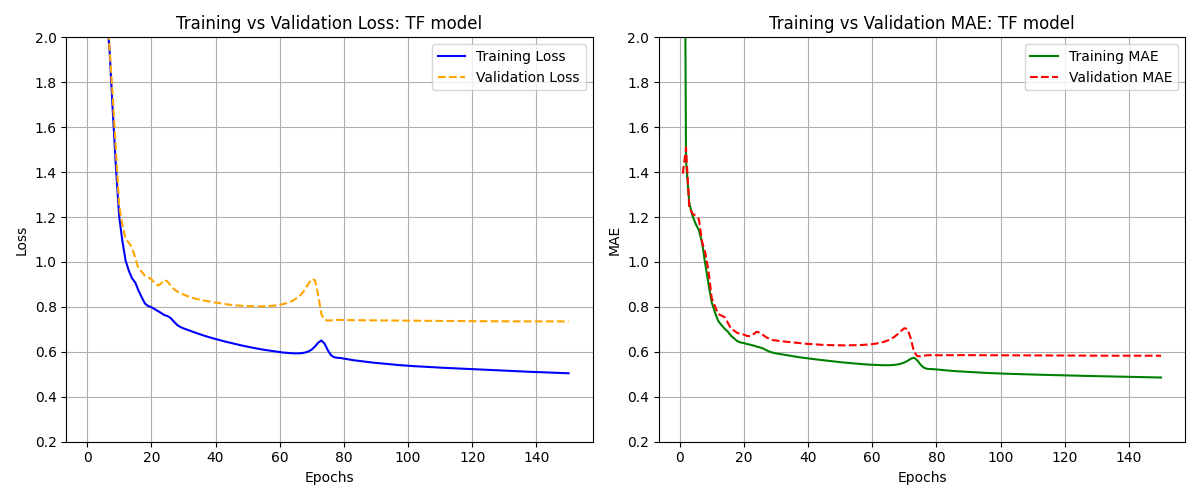

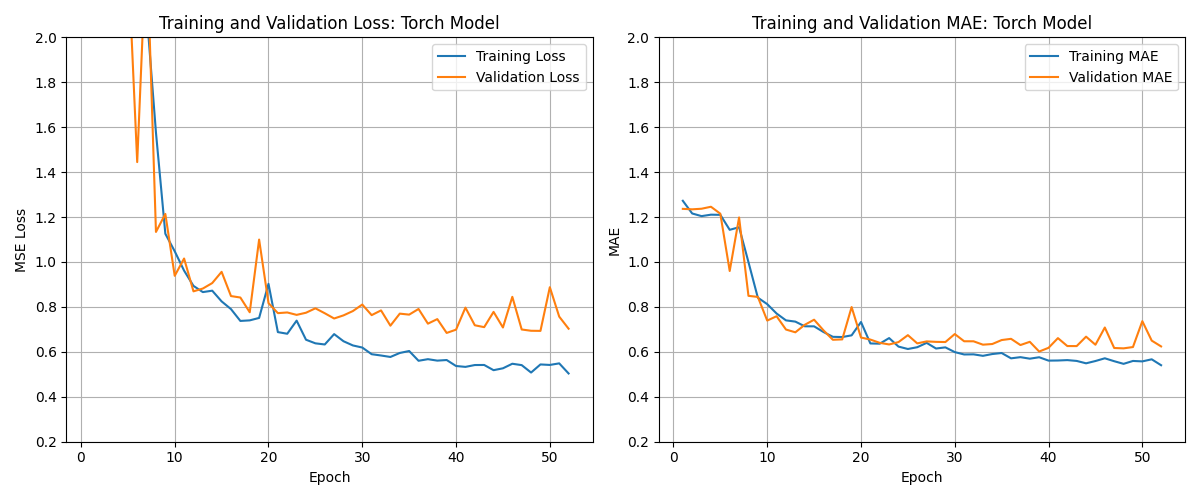

In [ ]:
from IPython.display import Image, display

# Display the first image
image_path_1 = '/content/drive/MyDrive/udemy_course/bio-info/data/tf_loss_mae.png'
display(Image(filename=image_path_1))

# Display the second image
image_path_2 = '/content/drive/MyDrive/udemy_course/bio-info/data/torch_loss_mae.png'
display(Image(filename=image_path_2))

### **Performance Summary**  

#### **Model Evaluation Metrics**  
| Model       | R² Score | RMSE  |
|------------|---------|-------|
| **TF Model** | 0.7260  | 0.8041 |
| **Torch Model**    | 0.6872  | 0.8591 |

#### **Key Observations**  
- The **TensorFlow model performs slightly better** than the PyTorch model in terms of both R² and RMSE.  
- The **TensorFlow model converges faster** than the PyTorch model.  
- The **TensorFlow model requires less computational power**, making it more efficient for training in resource-limited environments.  
- Due to **insufficient computational resources on Colab**, the PyTorch model was not fully trained, which may have impacted its performance.  



# Part 5 **Final Thoughts**  

- The **TensorFlow model is expected to have a smoother training process** due to its reliance on feature-engineered protein signatures.  
- Despite **incomplete training**, the PyTorch model still performs comparably, demonstrating that **transfer learning from text-based or other models is not only feasible but also highly effective in bioinformatics**.  
